,BB Temp
0,54.999802
1,50.001659
2,45.000671
3,39.999607
4,34.998707
5,30.000061
6,24.999840
7,20.001617
8,14.999565
9,9.999710


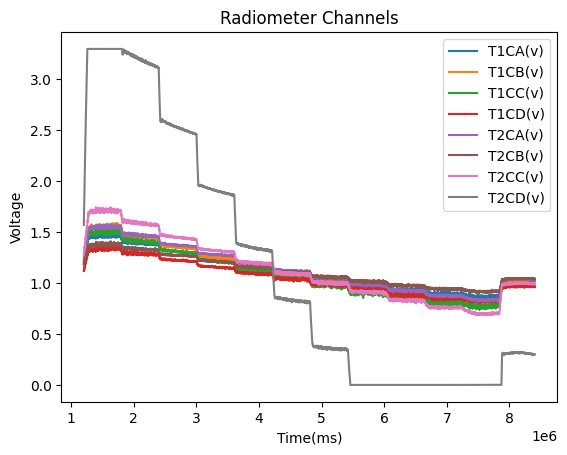

In [212]:
from os import walk
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from scipy.optimize import curve_fit

if __name__ == '__main__':
     sensor_file = 'Data/radiometer1_30_5-55_061623_sensor.csv'
     bb_file = 'Data/radiometer1_30_5-55_061623_BB.txt'

     bb_df = pd.read_csv(bb_file)
     bb_df.to_csv(r'Data/radiometer1_30_5-55_061623_BB.csv', index = None)
     
     bb_df.columns = ['BB Temp']
     
     display(bb_df)
     data = pd.read_csv(sensor_file)
     channel_col = []
     internal_col = []
     nums = [1,2]
     channels = ['A', 'B', 'C', 'D']
     for num in nums:
          for chan in channels:
               channel_col.append("T" + str(num) + "C" + str(chan) + "(v)")
          internal_col.append("T" + str(num) +"Therm(c)")

     data[data["Time(ms)"] > 1200000].plot(x = "Time(ms)", y = channel_col)
     #plt.scatter(bb_index, bb_df['BB Temp'])
     plt.title("Radiometer Channels")
     plt.ylabel("Voltage")
     plt.show()


Segment the data into different BB temps

In [232]:
#segment the data into the different BB temps
temp_dict = {}
temp_ranges = np.arange(55, 0, -5)
time_interval = 10 #minute length of each trial
lower_bound = 1200000 #time after s
time_interval_ms = 60000 * time_interval #convert minutes to milliseconds
for i in range(0, temp_ranges.size):
    temp_dict[str(temp_ranges[i])] = data[(data["Time(ms)"] > (lower_bound+120000)) & (data["Time(ms)"] < (lower_bound + time_interval_ms-30000))]
    lower_bound += time_interval_ms

Plot the sensor readings at different blackbody temperatures

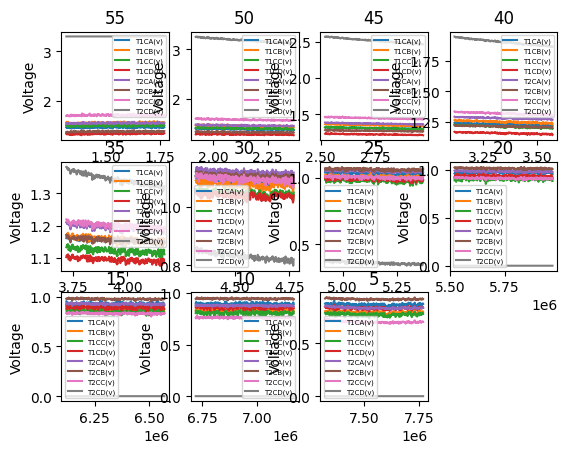

In [214]:
temp_max_min = pd.DataFrame()
temp_plots = plt.figure().tight_layout()
i = 1
for key in temp_dict:
    plt.subplot(3, 4, i)
    plt.plot(temp_dict[key].loc[:,"Time(ms)"], temp_dict[key].loc[:,channel_col])
    plt.title(key)
    plt.ylabel("Voltage")
    plt.legend(channel_col, fontsize = 5)
    i += 1
    max_temp = temp_dict[key].max() 
    max_temp_df = pd.DataFrame({'Max at ' + str(key): max_temp}).T

    min_temp = temp_dict[key].min() 
    min_temp_df = pd.DataFrame({'Min at ' + str(key): min_temp}).T
    temp_max_min= pd.concat([temp_max_min, max_temp_df, min_temp_df]) #transpose

plt.show()

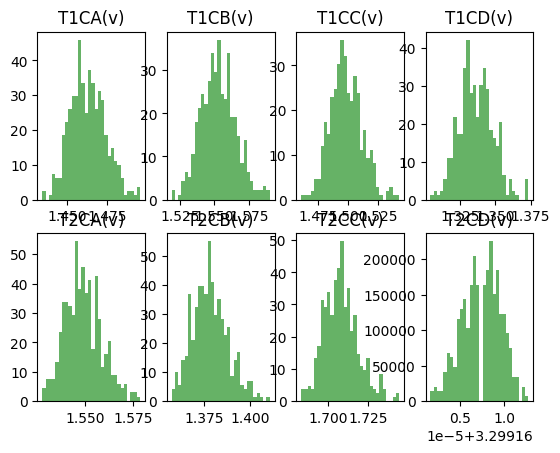

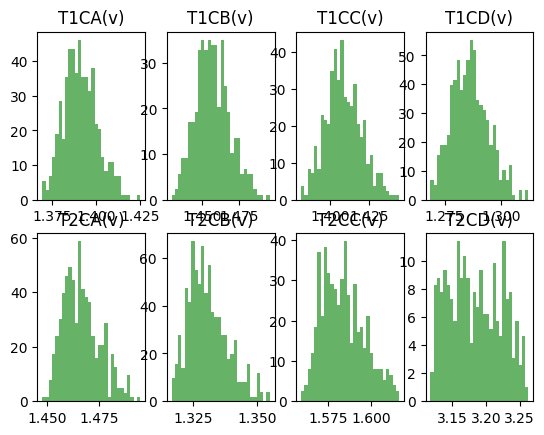

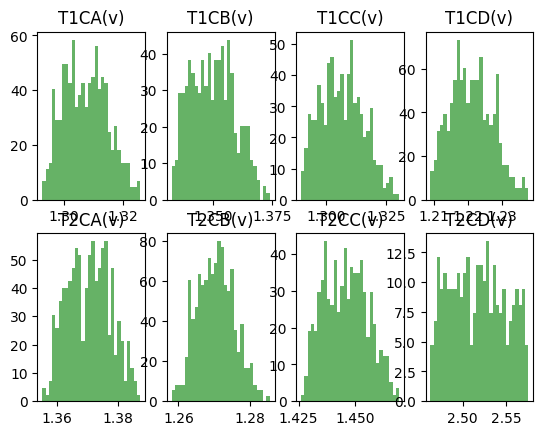

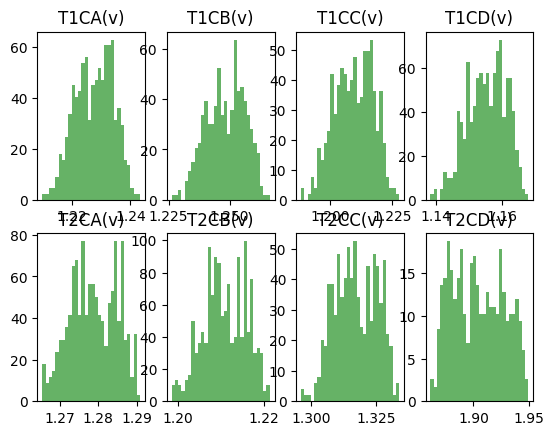

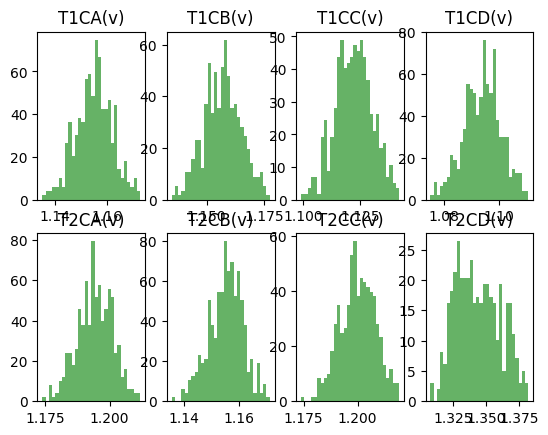

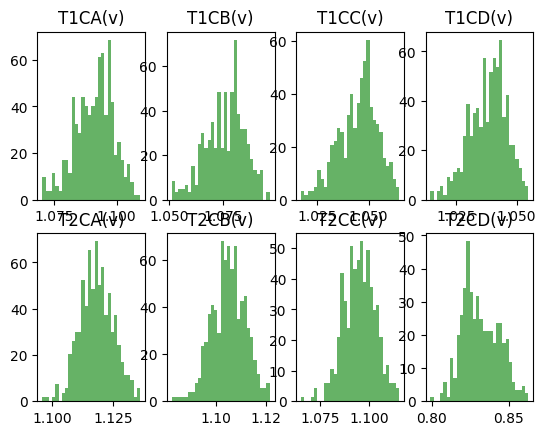

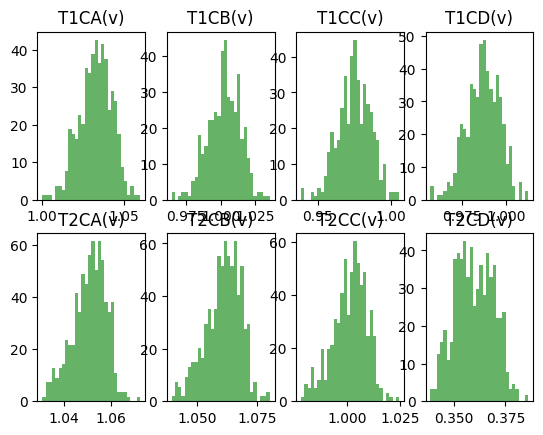

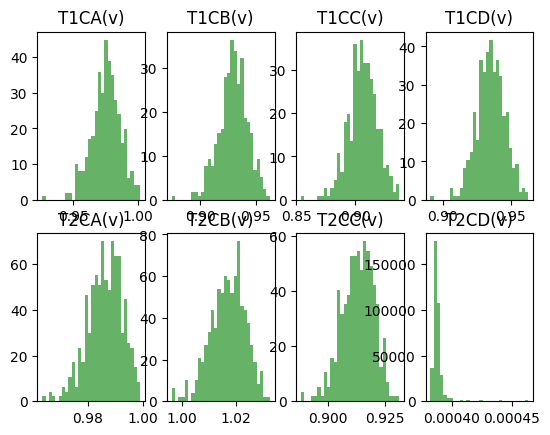

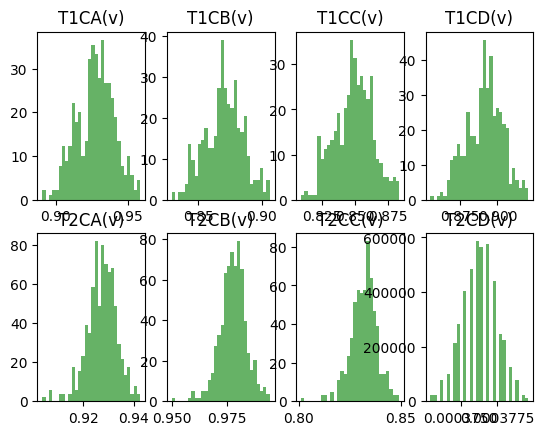

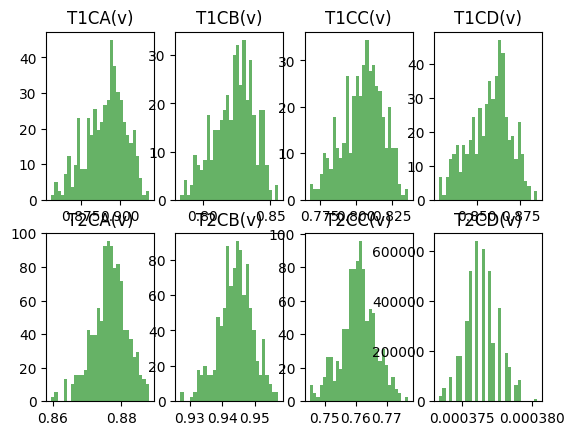

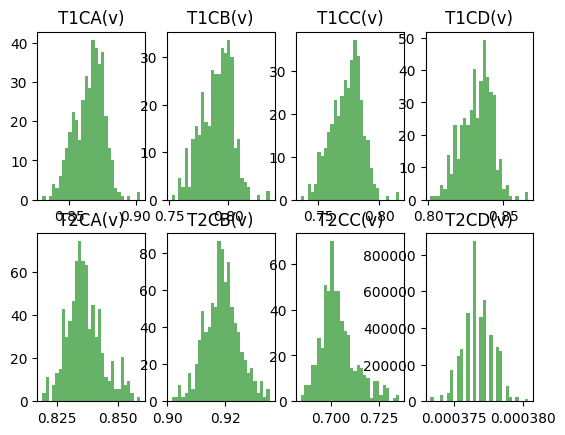

In [215]:
for key in temp_dict:
    plt.figure()
    temp = temp_dict[key]
    i = 1
    for chan in channel_col:
        plt.subplot(2, 4, i)
        plt.hist(temp[chan], bins=30, density=True, alpha=0.6, color='g')
        plt.title(chan)
        i += 1

,Temp,T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
55,55,1.463085,1.552912,1.498237,1.336428,1.549212,1.378172,1.707960,3.299167
50,50,1.391213,1.457394,1.408598,1.286398,1.466683,1.330800,1.583554,3.184314
45,45,1.307343,1.349803,1.306531,1.221129,1.370593,1.270403,1.445899,2.517710
40,40,1.227652,1.248424,1.209764,1.155445,1.278810,1.210935,1.317243,1.904163
35,35,1.155028,1.156905,1.122138,1.093829,1.194366,1.155218,1.200092,1.344161
30,30,1.091032,1.075915,1.044976,1.038214,1.118285,1.105033,1.095105,0.831734
25,25,1.032920,1.002414,0.975113,0.987073,1.050853,1.060837,1.001505,0.359824
20,20,0.975284,0.929928,0.906249,0.935233,0.986267,1.017176,0.913229,0.000388
15,15,0.927714,0.870004,0.849163,0.891381,0.927373,0.977547,0.831998,0.000376
10,10,0.891006,0.823274,0.804792,0.857363,0.876548,0.944130,0.760804,0.000376


,Temp,T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
55,55,0.010817,0.012537,0.013296,0.011950,0.009448,0.009671,0.010804,0.000002
50,50,0.009485,0.011583,0.011405,0.008165,0.008948,0.007634,0.012210,0.038271
45,45,0.007389,0.009077,0.008904,0.006188,0.006944,0.005132,0.009583,0.030869
40,40,0.006486,0.007896,0.007734,0.005928,0.006029,0.004931,0.007936,0.022782
35,35,0.006848,0.008056,0.008136,0.006738,0.006782,0.006201,0.008097,0.016632
30,30,0.007641,0.008991,0.009278,0.007712,0.006832,0.006654,0.008168,0.011970
25,25,0.009792,0.011506,0.011270,0.009361,0.007086,0.007239,0.008020,0.009256
20,20,0.011025,0.012895,0.012350,0.010373,0.006236,0.006377,0.006895,0.000006
15,15,0.012833,0.015016,0.014279,0.012089,0.005888,0.006009,0.006404,0.000001
10,10,0.012500,0.014628,0.013930,0.011803,0.005045,0.005171,0.005571,0.000001


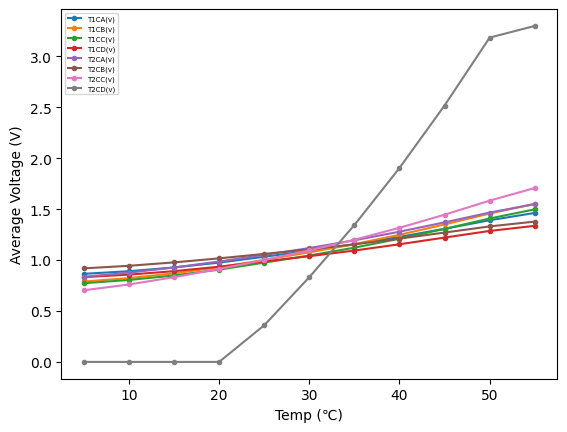

In [216]:
#calculate averages
ch_avgs = pd.DataFrame()
ch_std_dev = pd.DataFrame()
for key in temp_dict:
    temps = temp_dict[key]
    ch_avgs[key] = temps[channel_col].mean()
    ch_std_dev[key] = temps[channel_col].std()
ch_avgs=ch_avgs.T
ch_avgs.insert(loc = 0,
          column = 'Temp',
          value = temp_ranges)
ch_std_dev =ch_std_dev.T
ch_std_dev.insert(loc = 0,
          column = 'Temp',
          value = temp_ranges)

plt.plot(ch_avgs.loc[:,"Temp"], ch_avgs.loc[:,channel_col], marker = '.')
plt.legend(channel_col, fontsize = 5)
plt.xlabel("Temp (\N{DEGREE CELSIUS})")
plt.ylabel("Average Voltage (V)")
display(ch_avgs)
display(ch_std_dev)

In [217]:
#PLanck Radiance
def planck_radiance(wavelength, temperature):
    h = 6.62607015e-34  # Planck's constant
    c = 299792458  # Speed of light
    k = 1.38064852e-23  # Boltzmann constant

    numerator = 2 * h * c ** 2
    denominator = wavelength ** 5 * (np.exp((h * c) / (wavelength * k * temperature)) - 1)
    radiance = numerator / denominator
    return radiance

def linear_fit(x, slope , b):
    return slope * x + b

def quadratic_fit(x, a, b, c):
    return a * (x ** 2) + b * x + c

def gaussian_fit(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

,Time(ms),T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
1062,1200352,33.581483,33.513734,33.433862,34.734877,34.665505,33.943634,33.703162,37.786153
1063,1201481,32.563740,32.777334,32.590624,33.815403,34.118260,33.636205,33.004625,36.909328
1064,1202610,32.437637,32.447583,32.602526,34.389696,32.640419,31.824229,32.247092,36.058182
1065,1203739,30.360214,30.284271,29.865037,30.941384,32.095021,31.134927,31.429348,35.132677
1066,1204868,29.041813,29.254479,29.174642,30.467870,31.574761,30.498022,30.584971,34.230093
...,...,...,...,...,...,...,...,...,...
7431,8394645,15.052693,14.988704,14.825701,20.280813,16.095111,19.854205,13.443151,28.749411
7432,8395774,15.586398,14.894447,14.810389,20.550204,16.670189,19.767517,14.681549,28.858678
7433,8396903,16.217363,15.363197,15.733091,19.593611,16.684841,19.580782,14.664084,28.906714
7434,8398032,14.610434,13.798056,13.920570,19.079327,16.396644,19.660168,13.752408,28.748207


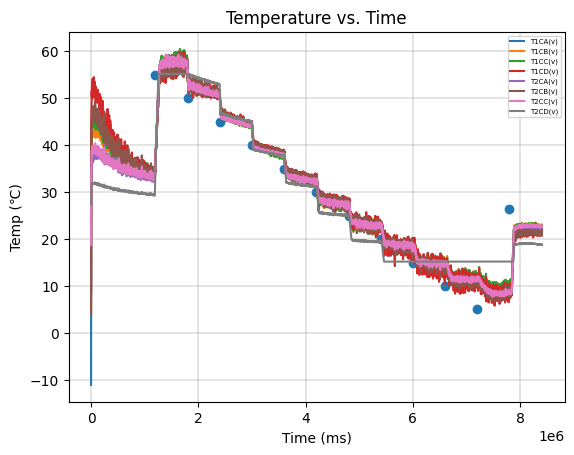

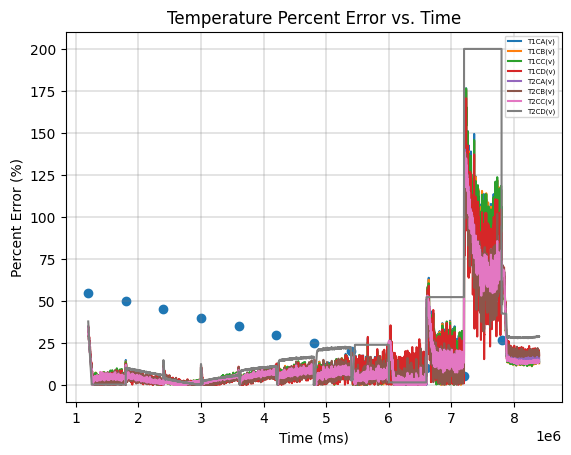

In [253]:
#obtain curves for data
temp_popt = {}
temp_pcov = {}
plt.figure()
bb_index = np.arange(1.2e6,8.4e6,0.6e6)
data_temp = data.copy()
temp_error = pd.DataFrame()
for chan in channel_col:
    temp_popt[chan], temp_pcov[chan] = curve_fit(linear_fit, ch_avgs[chan], ch_avgs["Temp"])
    calc_temp = linear_fit(data[chan], *temp_popt[chan])
    data_temp[chan] = calc_temp
    plt.plot(data["Time(ms)"], calc_temp)
    plt.xlabel("Time (ms)")
    plt.ylabel("Temp (\N{DEGREE CELSIUS})")

plt.title("Temperature vs. Time")
plt.grid(color='gray', linestyle='-', linewidth=0.3)
plt.legend(channel_col, fontsize = 5)
plt.scatter(bb_index, bb_df['BB Temp'])

#Plot error
plt.figure()
lower_bound = 1200000
#display(data_temp)
for i in range(0, bb_df['BB Temp'].size):
    bb_temp = bb_df['BB Temp']
    data_temp_interval = data_temp[(data_temp["Time(ms)"] > (lower_bound)) & (data_temp["Time(ms)"] < (lower_bound + time_interval_ms))]
    #display(data_temp_interval)
    temp_error = pd.concat([temp_error, ((abs((data_temp_interval[channel_col] - bb_temp[i])/bb_temp[i])) * 100)]) #convert the voltage to a temp and calculate percent error
    lower_bound += time_interval_ms
temp_times = data_temp[(data_temp["Time(ms)"] > (1200000)) & (data_temp["Time(ms)"] < (lower_bound))]["Time(ms)"]
temp_error.insert(loc = 0,column = 'Time(ms)', value = temp_times)

for ch in channel_col:
    plt.plot(temp_error["Time(ms)"], temp_error[ch])

plt.xlabel("Time (ms)")
plt.ylabel("Percent Error (%)")
plt.title("Temperature Percent Error vs. Time")
plt.grid(color='gray', linestyle='-', linewidth=0.3)
plt.legend(channel_col, fontsize = 5)
plt.scatter(bb_index, bb_df['BB Temp'])
display(temp_error)
#plt.plot(data["Time(ms)"], linear_fit(data["T2CD(v)"], *temp_popt["T2CD(v)"]))
#plt.plot(data["T1CB(v)"], linear_fit(data["T1CB(v)"], *temp_popt["T1CB(v)"]))

#line up BB temp and measured temp, find error

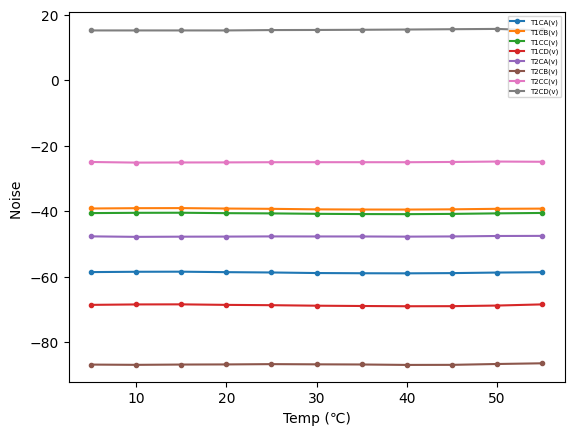

In [219]:
#Plot noise in temperature domain DOESN'T WORK
temp_popt = {}
temp_pcov = {}
plt.figure()
for chan in channel_col:
    temp_popt[chan], temp_pcov[chan] = curve_fit(linear_fit, ch_avgs[chan], ch_avgs["Temp"])
    noise = linear_fit(ch_std_dev[chan], *temp_popt[chan] )

    plt.plot(ch_avgs["Temp"], noise, marker = '.')
    #plt.xlabel("Time (ms)")
plt.xlabel("Temp (\N{DEGREE CELSIUS})")
plt.ylabel("Noise ")
plt.legend(channel_col, fontsize = 5)

Calculating Temperature to Radiance Curves

,Temperature,T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
0,55,8.874461e-17,7.936999e-17,7.403979e-17,6.709479e-17,3.599954e-17,2.756010e-17,1.970217e-17,3.508029e-17
1,50,8.067680e-17,7.215443e-17,6.730880e-17,6.099517e-17,3.272681e-17,2.505461e-17,1.791104e-17,3.189113e-17
2,45,7.260898e-17,6.493887e-17,6.057781e-17,5.489556e-17,2.945409e-17,2.254911e-17,1.611992e-17,2.870197e-17
3,40,6.454116e-17,5.772330e-17,5.384682e-17,4.879594e-17,2.618136e-17,2.004362e-17,1.432879e-17,2.551281e-17
4,35,5.647335e-17,5.050774e-17,4.711583e-17,4.269633e-17,2.290863e-17,1.753813e-17,1.253767e-17,2.232366e-17
5,30,4.840553e-17,4.329218e-17,4.038484e-17,3.659672e-17,1.963591e-17,1.503264e-17,1.074654e-17,1.913450e-17
6,25,4.033771e-17,3.607662e-17,3.365385e-17,3.049710e-17,1.636318e-17,1.252714e-17,8.955416e-18,1.594534e-17
7,20,3.226989e-17,2.886105e-17,2.692286e-17,2.439749e-17,1.309046e-17,1.002165e-17,7.164291e-18,1.275618e-17
8,15,2.420208e-17,2.164549e-17,2.019187e-17,1.829787e-17,9.817732e-18,7.516159e-18,5.373166e-18,9.567028e-18
9,10,1.613426e-17,1.442993e-17,1.346088e-17,1.219826e-17,6.545007e-18,5.010666e-18,3.582041e-18,6.377870e-18


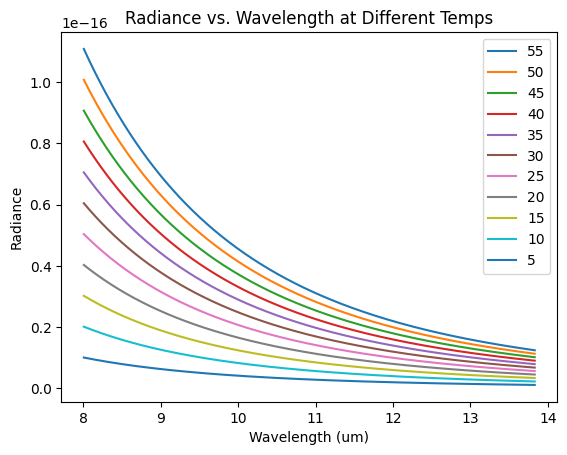

In [256]:
#read in response curve
dex = pd.read_csv("Data/dexter_filters.csv")
dex["Wavelength"] = dex["Wavelength"]
#normalize each channel by dividing by the max
dex_norm = dex
#chans = ['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8']
for ch in channel_col:
    dex_norm[ch] = dex[ch] / dex[ch].abs().max()



#use Planck radiance equation to obtain curves
planck = pd.DataFrame()
planck["Wavelength"] = dex_norm["Wavelength"]
plt.figure()
for temp in temp_ranges:
    planck[temp] = planck_radiance((planck["Wavelength"]), temp)
    plt.plot(planck["Wavelength"], planck[temp])
    plt.legend(temp_ranges)
    plt.title("Radiance vs. Wavelength at Different Temps")
    plt.xlabel("Wavelength (um)")
    plt.ylabel("Radiance")

be_radiance = pd.DataFrame()
be_radiance["Temperature"] = temp_ranges

be_radiance_test = pd.DataFrame()
be_radiance_test["Temperature"] = temp_ranges

#calculate BE radiance for each temperature at each channel
for ch in channel_col:
    radiance = []
    for temp in temp_ranges:
        numerator = 0
        for a, b in zip(planck[temp], dex_norm[ch]):
            numerator += a * b
        
        denominator = dex_norm[ch].sum()
        radiance.append(numerator/denominator)
    be_radiance[ch] = radiance

display(be_radiance)



Plot radiance vs. time from data

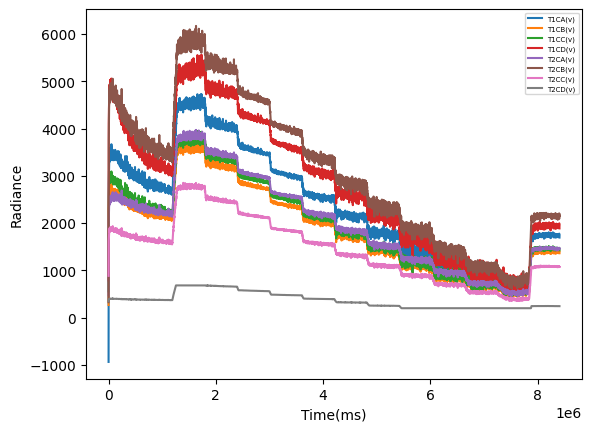

In [258]:


radiance_popt = {}
radiance_pcov = {}
plt.figure()
for chan in channel_col:
    radiance_popt[chan], radiance_pcov[chan] = curve_fit(linear_fit, be_radiance["Temperature"], be_radiance[chan])

    temp_to_radiance = linear_fit(data_temp[chan], *temp_popt[chan] )
    #calc_radiance = [planck_radiance(wavelength, temp) for temp in calc_temp]
    plt.plot(data_temp["Time(ms)"], temp_to_radiance)
    plt.xlabel("Time(ms)")
    plt.ylabel("Radiance")
    plt.legend(channel_col, fontsize = 5)

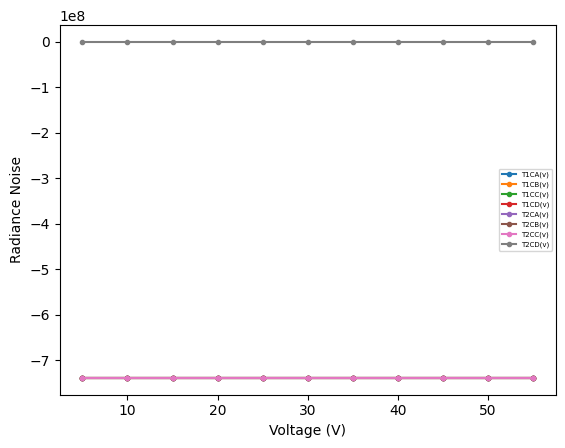

In [222]:
#plot noise NOT WORKING
wavelength = 11e-6 #wavelength in microns
plt.figure()
for chan in channel_col:
    temp_popt[chan], temp_pcov[chan] = curve_fit(linear_fit, ch_avgs[chan], ch_avgs["Temp"])

    calc_temp = linear_fit(ch_std_dev[chan], *temp_popt[chan] )
    calc_radiance = [planck_radiance(wavelength, temp) for temp in calc_temp]
    plt.plot(ch_avgs["Temp"], calc_radiance, marker = '.')
    plt.xlabel("Voltage (V)")
    plt.ylabel("Radiance Noise")
    plt.legend(channel_col, fontsize = 5)